In [1]:
import numpy as np
import matplotlib.pyplot as plt
import DataPreprocessing
from functools import reduce

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [8]:
def graph_data(me_filename, mom_filename):    
    me = np.load(me_filename, allow_pickle=True) #Matrix elements
    mom_raw = np.load(mom_filename, allow_pickle=True, encoding='bytes') #4-momenta of inputs
    mom = np.array([np.array(element) for element in mom_raw])
    
    ##Gradient
    mandel = DataPreprocessing.mandel_creation(['2,3'], mom).T
    
    linreg = LinearRegression().fit(np.log10(mandel[50:]), np.log10(me[50:]))
    print('Gradient : {}'.format(linreg.coef_[0]))
    print('Intercept : {}'.format(linreg.intercept_))
    
    return (me, DataPreprocessing.mandel_creation(['2,3'], mom)[0], linreg)

Gradient : -1.9887968766634327
Intercept : -2.0807994475364886


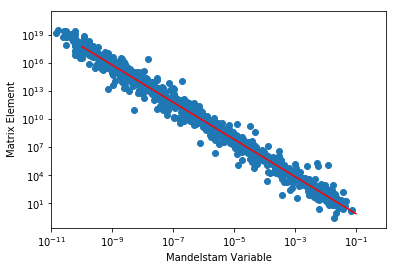

In [9]:
me, S, linreg = graph_data('LO/MG_uuuxux_smalls/me_999.npy', 'LO/MG_uuuxux_smalls/mom_999.npy')

plt.xlim(10**-(11), 1)
plt.yscale('log')
plt.xscale('log')

plt.ylabel('Matrix Element')
plt.xlabel('Mandelstam Variable')
plt.scatter(S, me)

plt.plot(np.logspace(-10, -1,100),10**linreg.predict(np.array([np.linspace(-10, -1,100)]).T),color='r')